In [1]:
from myst_nb import glue
my_variable = "here is some text!"
glue("cool_text", my_variable)

'here is some text!'

In [2]:
# Simulate some data and bootstrap the mean of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

In [3]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

3.0002792647050733

2.988124729261021

3.0127264226602697

In [4]:
glue("boot_chi_notdisplayed", chi, display=False)

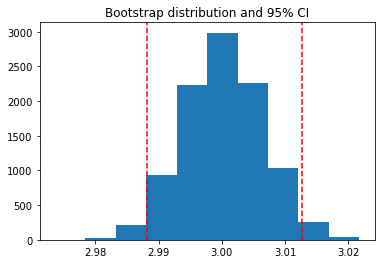

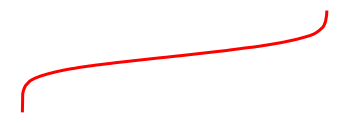

In [5]:
# Visualize the histogram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")

# And a wider figure to show a timeseries
fig2, ax = plt.subplots(figsize=(6, 2))
ax.plot(np.sort(means), lw=3, c='r')
ax.set_axis_off()

glue("boot_fig", fig, display=False)
glue("sorted_means_fig", fig2, display=False)

In [6]:
bootstrap_subsets = data[bootstrap_indices][:3, :5].T
df = pd.DataFrame(bootstrap_subsets, columns=["first", "second", "third"])
glue("df_tbl", df)

,first,second,third
0,3.254183,2.759200,3.125026
1,3.224861,2.691895,3.286983
2,3.230790,2.865231,2.811285
3,3.296647,2.791874,3.327421
4,3.159342,3.066524,3.037122


In [7]:
import sympy as sym
f = sym.Function('f')
y = sym.Function('y')
n = sym.symbols(r'\alpha')
f = y(n)-2*y(n-1/sym.pi)-5*y(n-2)
glue("sym_eq", sym.rsolve(f,y(n),[1,4]))

(sqrt(5)*I)**\alpha*(1/2 - 2*sqrt(5)*I/5) + (-sqrt(5)*I)**\alpha*(1/2 + 2*sqrt(5)*I/5)